<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the Life expectancy dataset and display the first five records 

In [2]:
# load the csv file

# type your code here
df = pd.read_csv('Life_Expectancy_1.csv')

# display the first five observations

# type your code here
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [3]:
# check the size of the dataframe

# type your code here
df.shape

(182, 20)

In [4]:
# display dataset information understand the dataset

# type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
df.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    4
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        9
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
df = df.dropna(subset = ['Life_Expectancy'])

In [7]:
# type your code here
df = df.drop('Alcohol',axis=1)

In [8]:
df = df.reset_index(drop=True)

In [9]:
num_data = df.select_dtypes(include=np.number)
cat_data = df.select_dtypes(exclude=np.number)

In [10]:
from sklearn.impute import KNNImputer
fill_mod=KNNImputer(n_neighbors=3)
data_fill=fill_mod.fit_transform(num_data)
data_fill=pd.DataFrame(data_fill)
data_fill.columns=num_data.columns
num_data = data_fill

In [11]:
num_data.isnull().sum()

Year                 0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df['Year'].value_counts()

2015    172
2013      1
Name: Year, dtype: int64

In [13]:
#df = df.drop(['Year','Country','Infant_Deaths'],axis=1)
num_data = num_data.drop(['Year','Infant_Deaths'],axis=1)
cat_data = cat_data.drop('Country',1)

In [14]:
df = pd.concat((num_data,cat_data),axis=1)
df

,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status
0,263.0,65.0,1154.0,19.1,83.0,6.0,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1,65.0,Developing
1,74.0,99.0,0.0,58.0,0.0,99.0,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2,77.8,Developing
2,19.0,95.0,63.0,59.5,24.0,95.0,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4,75.6,Developing
3,335.0,64.0,118.0,23.3,98.0,7.0,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4,52.4,Developing
4,13.0,99.0,0.0,47.7,0.0,86.0,99.0,0.2,13566.954100,2.105266e+07,3.3,3.3,0.784,13.9,76.4,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,157.0,87.0,0.0,62.1,10.0,87.0,87.0,0.1,6926.526855,1.724487e+07,1.6,1.5,0.769,14.3,74.1,Developing
169,127.0,97.0,256.0,17.5,35.0,97.0,97.0,0.1,7689.930440,1.417156e+06,14.2,14.5,0.678,12.6,76.0,Developing
170,224.0,69.0,468.0,41.3,47.0,63.0,69.0,0.1,1539.509068,5.998595e+06,13.6,13.4,0.499,9.0,65.7,Developing
171,33.0,9.0,9.0,23.4,40.0,9.0,9.0,4.1,1313.889646,1.615870e+05,6.3,6.1,0.576,12.5,61.8,Developing


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
df = pd.get_dummies(df,drop_first=True)

<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
import statsmodels.api as sm

-1.659830672906537e-08


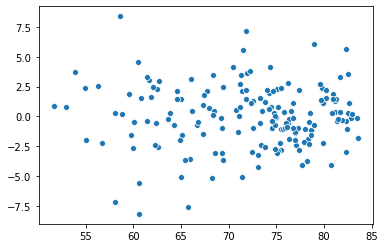

In [17]:
# type your code here
inp = df.drop('Life_Expectancy',axis = 1)
out = df['Life_Expectancy']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()
print(ols_mod.resid.sum())
sns.scatterplot(ols_mod.predict(),ols_mod.resid)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
inp = df[['Diphtheria ','Polio','Hepatitis B']]
out = df['Life_Expectancy']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     29.31
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           2.61e-15
Time:                        16:18:01   Log-Likelihood:                -569.18
No. Observations:                 173   AIC:                             1146.
Df Residuals:                     169   BIC:                             1159.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          53.9433      2.022     26.683      0.000      49.952      57.934
Diphtheria      0.1440      0.059      2.459      0.015       0.028       0.260
Polio           0.1107      0.027      4.127      0.000       0.058       0.164
Hepatitis B    -0.0398      0.052     -0.771      0.442      -0.142       0.062
==============================================================================
Omnibus:                        6.613   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.844
Skew:                          -0.480   Prob(JB):                       0.0326
Kurtosis:                       2.835   Cond. No.                         604.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Polio is not a significant feature as P(t-stat) >0.05
# Diptheria is a significant feature as P(t-stat)  < 0.05
# Hepatitis b is not a significant feature as P(t-stat) > 0.05

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
inp = df[['Malnourished10_19','Malnourished5_9']]
out = df['Life_Expectancy']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     26.87
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           7.25e-11
Time:                        16:18:02   Log-Likelihood:                -581.66
No. Observations:                 173   AIC:                             1169.
Df Residuals:                     170   BIC:                             1179.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.3263      0.797     95.808      0.000      74.754      77.899
Malnourished10_19    -0.4515      0.557     -0.810      0.419      -1.552       0.649
Malnourished5_9      -0.4933      0.546     -0.903      0.368      -1.572       0.585
==============================================================================
Omnibus:                        5.222   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                5.331
Skew:                          -0.422   Prob(JB):                       0.0696
Kurtosis:                       2.837   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Malnourished10_19 is not a significant feature as P(t-stat) > 0.05
# Malnourished5_9 is not a significant feature as P(t-stat)  > 0.05

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(df)
data_sc=pd.DataFrame(data_sc,columns=df.columns)

In [23]:
# type your code here

inp = data_sc[['Adult_Mortality']]
out = data_sc['Life_Expectancy']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     255.3
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           9.38e-36
Time:                        16:18:02   Log-Likelihood:                -166.45
No. Observations:                 173   AIC:                             336.9
Df Residuals:                     171   BIC:                             343.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.331e-16      0.048   6.88e-15      1.000      -0.096       0.096
Adult_Mortality    -0.7739      0.048    -15.979      0.000      -0.869      -0.678
==============================================================================
Omnibus:                       75.666   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.048
Skew:                          -1.761   Prob(JB):                     1.13e-55
Kurtosis:                       7.764   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
sgd = SGDRegressor()
sgd.fit(inp,out)
ypred = sgd.predict(inp)
r2 = r2_score(out,ypred)
r2

0.5986944802919478

In [26]:
sgd.coef_

array([-0.75954301])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
inp = data_sc[['Diphtheria ','Polio','Hepatitis B']]
lr = LinearRegression()
lr.fit(inp,out)
ypred = lr.predict(inp)
r2 = r2_score(out,ypred)
lr.coef_

array([ 0.40674649,  0.34222688, -0.11963392])

In [30]:
# type your code here
inp = data_sc[['Diphtheria ','Polio','Hepatitis B']]
sgd = SGDRegressor()
sgd.fit(inp,out)
ypred = sgd.predict(inp)
r2 = r2_score(out,ypred)
sgd.coef_

array([0.22564445, 0.32622371, 0.0726312 ])

In [31]:
coeff = pd.DataFrame()
coeff['LR'] = lr.coef_
coeff['SGD'] = sgd.coef_
coeff.index = inp.columns
coeff

,LR,SGD
Diphtheria,0.406746,0.225644
Polio,0.342227,0.326224
Hepatitis B,-0.119634,0.072631


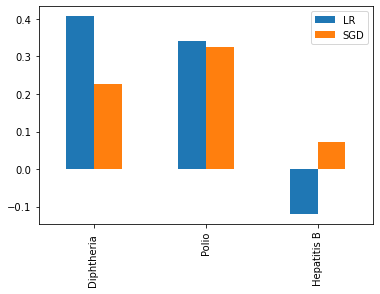

In [32]:
coeff.plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns)

In [75]:
# type your code here
from sklearn.model_selection import train_test_split
inp = data_sc.drop('Life_Expectancy',axis = 1)
out = data_sc['Life_Expectancy']
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size = 0.3,random_state = 48)

In [81]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse = abs(cross_val_score(lr,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error'))
cva = np.std(mse)/np.mean(mse)
cva # as the co-efficient of variance is 0.28, the model is variating 28%. So the model is overfitting model.

0.28534166359045

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here
# As my target variable is continuous data we can use Linear Regression.
# We need to check all the assumptions are satisfied or not.

In [84]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
inp = df.drop('Life_Expectancy',axis = 1)
out = df['Life_Expectancy']
vif['VIF'] = [variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['Feature'] = inp.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Feature
12,178.408692,Income_Index
13,148.919827,Schooling
6,115.956799,Diphtheria
1,84.203184,Hepatitis B
10,46.492019,Malnourished10_19
11,46.052577,Malnourished5_9
5,25.841489,Polio
3,9.758160,BMI
14,7.010269,Status_Developing
0,6.842320,Adult_Mortality


In [85]:
inpv1 = inp.drop('Income_Index',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['Feature'] = inpv1.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Feature
6,112.589845,Diphtheria
1,82.219492,Hepatitis B
10,46.471863,Malnourished10_19
11,45.990670,Malnourished5_9
12,30.385699,Schooling
5,24.666085,Polio
3,9.274556,BMI
13,6.833883,Status_Developing
0,6.654566,Adult_Mortality
4,3.976656,Underfive_Deaths


In [87]:
inpv2 = inpv1.drop('Diphtheria ',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['Feature'] = inpv2.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Feature
9,45.531407,Malnourished10_19
10,45.373823,Malnourished5_9
11,28.490698,Schooling
1,23.743801,Hepatitis B
5,22.245443,Polio
3,9.204940,BMI
12,6.829358,Status_Developing
0,6.642848,Adult_Mortality
4,3.962879,Underfive_Deaths
2,2.837436,Measles


In [89]:
inpv3 = inpv2.drop('Malnourished10_19',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['Feature'] = inpv3.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Feature
10,27.635452,Schooling
5,22.086780,Polio
1,21.993957,Hepatitis B
3,9.139869,BMI
11,6.824508,Status_Developing
0,6.581902,Adult_Mortality
9,4.022546,Malnourished5_9
4,3.957635,Underfive_Deaths
2,2.835860,Measles
6,2.264763,HIV


In [90]:
inpv4 = inpv3.drop('Schooling',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv4.values,i) for i in range(inpv4.shape[1])]
vif['Feature'] = inpv4.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Feature
1,19.977404,Hepatitis B
5,18.524795,Polio
10,6.818939,Status_Developing
3,6.591098,BMI
0,6.571912,Adult_Mortality
9,4.010995,Malnourished5_9
4,3.937384,Underfive_Deaths
2,2.825527,Measles
6,2.219529,HIV
7,1.854164,GDP


In [91]:
inpv5 = inpv4.drop('Hepatitis B',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv5.values,i) for i in range(inpv5.shape[1])]
vif['Feature'] = inpv5.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Feature
4,8.602417,Polio
9,6.809807,Status_Developing
0,6.279390,Adult_Mortality
2,6.240907,BMI
8,3.928962,Malnourished5_9
3,3.875119,Underfive_Deaths
1,2.802214,Measles
5,2.157626,HIV
6,1.853681,GDP
7,1.414716,Population


In [92]:
inpc = sm.add_constant(inpv5)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     57.67
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           3.22e-48
Time:                        22:01:57   Log-Likelihood:                -474.17
No. Observations:                 173   AIC:                             970.3
Df Residuals:                     162   BIC:                             1005.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                74.2574      1.908     38.922      0.000      70.490      78.025
Adult_Mortality      -0.0346      0.004     -7.854      0.000      -0.043      -0.026
Measles            6.667e-05   6.03e-05      1.106      0.271   -5.24e-05       0.000
BMI                   0.0412      0.018      2.317      0.022       0.006       0.076
Underfive_Deaths     -0.0038      0.005     -0.726      0.469      -0.014       0.006
Polio                 0.0631      0.014      4.543      0.000       0.036       0.091
HIV                  -0.9306      0.291     -3.201      0.002      -1.505      -0.356
GDP                6.832e-05   2.96e-05      2.307      0.022    9.85e-06       0.000
Population         9.014e-10    1.2e-08      0.075      0.940   -2.27e-08    2.45e-08
Malnourished5_9      -0.2763      0.098     -2.813      0.006      -0.470      -0.082
Status_Developing    -3.3602      0.901     -3.731      0.000      -5.138      -1.582
==============================================================================
Omnibus:                        9.331   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               11.807
Skew:                          -0.367   Prob(JB):                      0.00273
Kurtosis:                       4.048   Cond. No.                     1.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
from statsmodels.stats.diagnostic import linear_rainbow

In [94]:
linear_rainbow(res = ols_mod,frac=0.5)  # Linear

(1.114220452445604, 0.31647159957112264)

In [96]:
ols_mod.resid.skew() # Normal

-0.37052348273029134

In [97]:
# No autocorrelation as Durbin-Watson test value(1.91) is in range 1.5 - 2.5

In [98]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_mod.resid,ols_mod.model.exog)

(1.0589527255046365, 0.40185959129574217, 'increasing')

In [ ]:
# The model is homoscadastic

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
inp = df.drop('Life_Expectancy',axis = 1)
out = df['Life_Expectancy']
import scipy.stats as stats
box_out,lam=stats.boxcox(out)

In [37]:
# type your code here
#Lasso
from sklearn.linear_model import Lasso
mod_lasso = Lasso(alpha=0.05)
mod_lasso.fit(inp_sc,out)
mod_lasso.coef_

array([-1.91451162,  0.81187116,  0.        , -0.25161784, -0.01344604,
        0.18653257,  0.        , -0.80783779, -0.        , -0.18814934,
       -0.32963999, -0.03526499,  4.99925123,  0.        , -0.14427802])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your code here
# create Lasso and Ridge with all 5 deseases and check which coeff drcrease drastically
inp = df[['Diphtheria ','Polio','Hepatitis B','Measles ','HIV']]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns)

In [39]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
mod_lr = LinearRegression()
mod_lr.fit(inp_sc,out)
mod_lr.coef_

array([ 1.89259761,  2.0112169 , -0.65007108, -0.68392732, -3.46763413])

In [40]:
mod_lasso = Lasso(alpha=1.5)
mod_lasso.fit(inp_sc,out)
mod_lasso.coef_

array([ 0.66913415,  1.33729331,  0.        , -0.        , -2.51861867])

In [41]:
mod_rid = Ridge(alpha=1.5)
mod_rid.fit(inp_sc,out)
mod_rid.coef_

array([ 1.78854635,  2.00521981, -0.53619908, -0.67888073, -3.4415349 ])

In [42]:
scorecard = pd.DataFrame()
scorecard['Linear Regression'] = mod_lr.coef_
scorecard['Lasso_1.5'] = mod_lasso.coef_
scorecard['Ridge_1.5'] = mod_rid.coef_
scorecard.index = inp_sc.columns
scorecard

,Linear Regression,Lasso_1.5,Ridge_1.5
Diphtheria,1.892598,0.669134,1.788546
Polio,2.011217,1.337293,2.005220
Hepatitis B,-0.650071,0.000000,-0.536199
Measles,-0.683927,-0.000000,-0.678881
HIV,-3.467634,-2.518619,-3.441535


In [43]:
#Hepatitis B and Measles are not significant features.Diptheria, Polio and HIV are significant features.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
inp = df[['Measles ','HIV','Malnourished10_19','Malnourished5_9']]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns)

In [45]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
mod_lr = LinearRegression()
mod_lr.fit(inp_sc,out)
mod_lr.coef_

array([ 0.35089667, -4.29276345, -0.30410356, -2.98968435])

In [46]:
mod_lasso = Lasso(alpha=1)
mod_lasso.fit(inp_sc,out)
mod_lasso.coef_

array([ 0.        , -3.4754184 , -0.02478068, -2.28232815])

In [47]:
mod_rid = Ridge(alpha=1)
mod_rid.fit(inp_sc,out)
mod_rid.coef_

array([ 0.34907689, -4.26520583, -0.54260658, -2.74592144])

In [48]:
scorecard = pd.DataFrame()
scorecard['Linear Regression'] = mod_lr.coef_
scorecard['Lasso_1'] = mod_lasso.coef_
scorecard['Ridge_1'] = mod_rid.coef_
scorecard.index = inp_sc.columns
scorecard

,Linear Regression,Lasso_1,Ridge_1
Measles,0.350897,0.000000,0.349077
HIV,-4.292763,-3.475418,-4.265206
Malnourished10_19,-0.304104,-0.024781,-0.542607
Malnourished5_9,-2.989684,-2.282328,-2.745921


In [49]:
#Measles is the insignificant feature.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# type your code here
from sklearn.model_selection import GridSearchCV
enet = ElasticNet()
param = {'alpha':[0.1],
        'l1_ratio':[0.001]}
inp = data_sc.drop('Life_Expectancy',axis=1)
out = data_sc['Life_Expectancy']
grid = GridSearchCV(enet,param_grid = param, cv = 3 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inp,out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 0.1, 'l1_ratio': 0.001}
0.12704965560099984


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# type your code here
inp = df.drop('Life_Expectancy',axis = 1)
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns)

In [52]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
mod_lr = LinearRegression()
mod_lr.fit(inp_sc,out)
mod_lr.coef_

array([-1.91747617,  1.12102693,  0.13000607, -0.40430458, -0.15296753,
        0.22836507, -0.36750498, -0.84607881, -0.05043129, -0.20995694,
       -0.24218729, -0.1607139 ,  5.15292703, -0.04506628, -0.18759349])

In [53]:
mod_lasso = Lasso(alpha=0.5)
mod_lasso.fit(inp_sc,out)
mod_lasso.coef_

array([-1.7476948 ,  0.53211224, -0.        ,  0.        , -0.        ,
        0.13656166,  0.        , -0.61467294,  0.        , -0.        ,
       -0.        , -0.        ,  5.01363423,  0.        , -0.        ])

In [54]:
mod_rid = Ridge(alpha=0.5)
mod_rid.fit(inp_sc,out)
mod_rid.coef_

array([-1.93041627,  1.07854357,  0.12810397, -0.3886355 , -0.14854368,
        0.23793762, -0.32463951, -0.85124349, -0.03738655, -0.2094628 ,
       -0.24683241, -0.16160432,  5.01019298,  0.05087586, -0.1916237 ])

In [55]:
scorecard = pd.DataFrame()
scorecard['Linear Regression'] = mod_lr.coef_
scorecard['Lasso_0.5'] = mod_lasso.coef_
scorecard['Ridge_0.5'] = mod_rid.coef_
scorecard.index = inp_sc.columns
scorecard

,Linear Regression,Lasso_0.5,Ridge_0.5
Adult_Mortality,-1.917476,-1.747695,-1.930416
Hepatitis B,1.121027,0.532112,1.078544
Measles,0.130006,-0.000000,0.128104
BMI,-0.404305,0.000000,-0.388636
Underfive_Deaths,-0.152968,-0.000000,-0.148544
Polio,0.228365,0.136562,0.237938
Diphtheria,-0.367505,0.000000,-0.324640
HIV,-0.846079,-0.614673,-0.851243
GDP,-0.050431,0.000000,-0.037387
Population,-0.209957,-0.000000,-0.209463


In [56]:
#Adult_Mortality , Hepatitis B, Polio , HIV , Income_Index are significant features.

<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
# type your code here
rid = Ridge()
param = {'alpha':[7,8,9,10,11]}
grid = GridSearchCV(rid,param_grid=param,cv=3,scoring='neg_mean_squared_error')
grid_mod = grid.fit(inp,out)
print(grid_mod.best_params_)
print(abs(grid_mod.best_score_))

{'alpha': 7}
0.12590149345058535


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
# type your code here
las = Lasso()
param = {'alpha':[7,8,9,10,11]}
grid = GridSearchCV(las,param_grid=param,cv=3,scoring='neg_mean_squared_error')
grid_mod = grid.fit(inp,out)
print(grid_mod.best_params_)
print(abs(grid_mod.best_score_))

{'alpha': 7}
1.0016933211988035


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
# type your code here
enet = ElasticNet()
param = {'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
        'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}
inp = data_sc[['Measles ','HIV','Malnourished10_19','Malnourished5_9']]
out = data_sc['Life_Expectancy']
grid = GridSearchCV(enet,param_grid = param, cv = 3 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inp,out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 0.1, 'l1_ratio': 0.5}
0.5152196835492617


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
# type your code here
enet = ElasticNet()
param = {'alpha':[0.8],
        'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
inp = data_sc.drop('Life_Expectancy',axis=1)
out = data_sc['Life_Expectancy']
grid = GridSearchCV(enet,param_grid = param, cv = 3 , scoring = 'neg_mean_squared_error')
mod_hyp = grid.fit(inp,out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 0.8, 'l1_ratio': 0.001}
0.16180453714801185
